In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [29]:
data = pd.read_csv('emails.csv')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [31]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [32]:
data.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [33]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [34]:
data.shape

(5172, 3002)

In [35]:
data = data.dropna(subset=['Prediction'])
X = data.drop(['Email No.', 'Prediction'], axis=1)
Y = data['Prediction']
# X = data.iloc[:,1:-1].values
# Y = data.iloc[:,-1].values

In [36]:
X.shape

(5172, 3000)

In [37]:
print(X.shape[0], Y.shape[0]) 

5172 5172


<Axes: xlabel='Prediction', ylabel='count'>

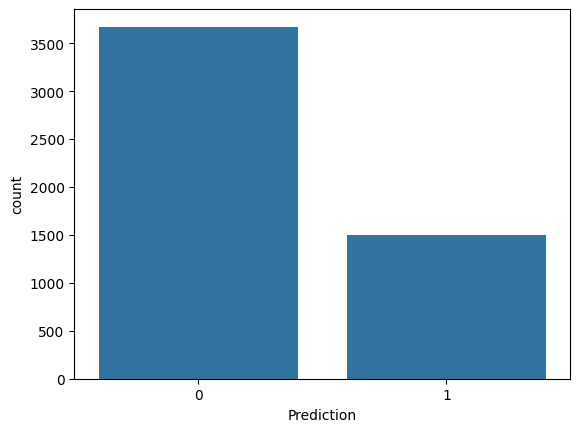

In [38]:
sns.countplot(x=Y)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

In [42]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [43]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

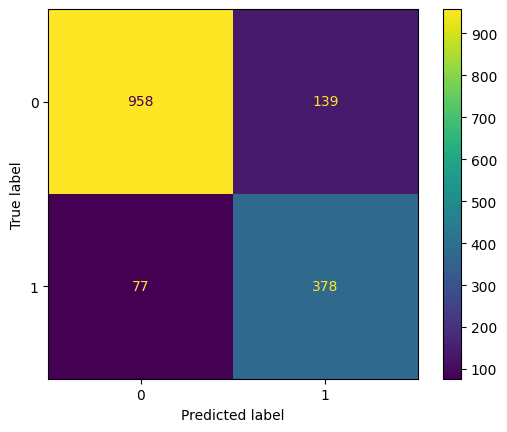

In [44]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_knn)

In [45]:
knn_accuracy = accuracy_score(Y_test, y_pred_knn)
print("accuracy : ",knn_accuracy)

knn_report = classification_report(Y_test, y_pred_knn)
print("Report : ", knn_report)

accuracy :  0.8608247422680413
Report :                precision    recall  f1-score   support

           0       0.93      0.87      0.90      1097
           1       0.73      0.83      0.78       455

    accuracy                           0.86      1552
   macro avg       0.83      0.85      0.84      1552
weighted avg       0.87      0.86      0.86      1552



In [46]:
from sklearn.svm import SVC
svm_model = SVC()

In [47]:
svm_model.fit(X_test, Y_test)

SVC()

In [48]:
y_svm_pred = svm_model.predict(X_test)
y_svm_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
svm_accuracy = accuracy_score(Y_test, y_svm_pred)
print("SVM accuracy : ", svm_accuracy)

svm_report = classification_report(Y_test, y_svm_pred)
print("SVM report : ", svm_report)

SVM accuracy :  0.7744845360824743
SVM report :                precision    recall  f1-score   support

           0       0.76      0.99      0.86      1097
           1       0.89      0.26      0.41       455

    accuracy                           0.77      1552
   macro avg       0.83      0.63      0.63      1552
weighted avg       0.80      0.77      0.73      1552

